In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression as LR
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn import preprocessing
df = pd.read_csv("/Users/gabri/Classes/MachineLearning2026/data/soccer.csv")
X = df.drop("target", axis=1)
y = df[["target"]]
X_train, y_train = X.iloc[:2560], y.iloc[:2560]
X_test, y_test = X.iloc[2560:], y.iloc[2560:]

In [9]:
X_train = X_train.drop(["home_team", "away_team"], axis=1)
X_test = X_test.drop(["home_team", "away_team"], axis=1)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = preprocessing.scale(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.metrics import accuracy_score

lda = LDA()
lda_fit = lda.fit(X_train, y_train)

qda = QDA()
qda_fit = qda.fit(X_train, y_train)

lr = LR()
lr_fit = lr.fit(X_train, y_train)

nb = NB()
nb_fit = nb.fit(X_train, y_train)

knn = kNN(n_neighbors=5)
knn_fit = knn.fit(X_train, y_train)

models = {
    "LDA": lda_fit,
    "QDA": qda_fit,
    "LogisticRegression": lr_fit,
    "NaiveBayes": nb_fit,
    "kNN": knn_fit
}

for name, m in models.items():
    y_pred_test = m.predict(X_test)
    y_pred_train = m.predict(X_train)

    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)

    print(name)
    print('Acurácia de teste = ', acc_test)
    print('Acurácia de treino = ', acc_train)



LDA
Acurácia de teste =  0.678125
Acurácia de treino =  0.709765625
QDA
Acurácia de teste =  0.6546875
Acurácia de treino =  0.70390625
LogisticRegression
Acurácia de teste =  0.6796875
Acurácia de treino =  0.711328125
NaiveBayes
Acurácia de teste =  0.678125
Acurácia de treino =  0.703515625
kNN
Acurácia de teste =  0.634375
Acurácia de treino =  0.76796875


/Users/gabri/Classes/MachineLearning2026/venv/lib/python3.14/site-packages/sklearn/utils/validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gabri/Classes/MachineLearning2026/venv/lib/python3.14/site-packages/sklearn/utils/validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gabri/Classes/MachineLearning2026/venv/lib/python3.14/site-packages/sklearn/utils/validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gabri/Classes/MachineLearning2026/venv/lib/python3.14/site-packages/sklearn/utils/validation.py:135

In [35]:
errors = {}

for name, m in models.items():
    y_pred_test = m.predict(X_test)
    y_pred_train = m.predict(X_train)

    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)

    errors[name] = (1-acc_train,1-acc_test)

errors



{'LDA': (0.29023437500000004, 0.321875),
 'QDA': (0.29609375000000004, 0.3453125),
 'LogisticRegression': (0.288671875, 0.3203125),
 'NaiveBayes': (0.296484375, 0.321875),
 'kNN': (0.23203125000000002, 0.365625)}

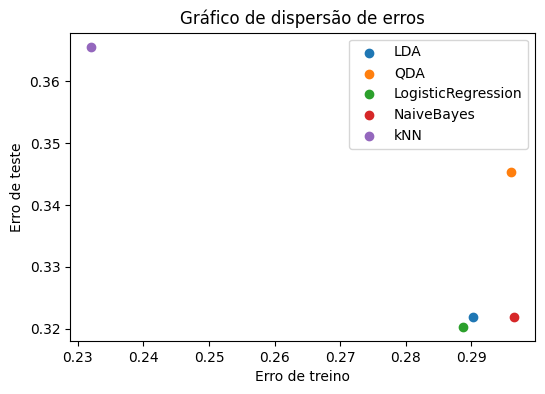

In [45]:
plt.figure(figsize=(6,4))
plt.title('Gráfico de dispersão de erros')

for model in models:
    plt.scatter(x = errors[model][0], y = errors[model][1],label = model)

plt.xlabel('Erro de treino')
plt.ylabel('Erro de teste')
plt.legend()
plt.show()

In [47]:
for k in range(1,11):

    knn = kNN(n_neighbors=k)
    knn_fit = knn.fit(X_train,y_train)
    y_pred_test = knn_fit.predict(X_test)
    y_pred_train = knn_fit.predict(X_train)

    name = 'knn' + f'{k}'

    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)

    if name == 'knn5':

        del errors["kNN"]

        errors['knn5'] = (1-acc_train,1-acc_test)

    else:

        errors[name] = (1-acc_train,1-acc_test)

errors


/Users/gabri/Classes/MachineLearning2026/venv/lib/python3.14/site-packages/sklearn/neighbors/_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/gabri/Classes/MachineLearning2026/venv/lib/python3.14/site-packages/sklearn/neighbors/_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/gabri/Classes/MachineLearning2026/venv/lib/python3.14/site-packages/sklearn/neighbors/_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/gabri/Classes/MachineLearning2026/venv/lib/python3.14/site-packages/sklearn/neighbors/_classification.

{'LDA': (0.29023437500000004, 0.321875),
 'QDA': (0.29609375000000004, 0.3453125),
 'LogisticRegression': (0.288671875, 0.3203125),
 'NaiveBayes': (0.296484375, 0.321875),
 'knn1': (0.0, 0.41093749999999996),
 'knn2': (0.18359375, 0.41093749999999996),
 'knn3': (0.19296875000000002, 0.3734375),
 'knn4': (0.23007812500000002, 0.36875),
 'knn6': (0.24726562500000004, 0.36875),
 'knn7': (0.24882812499999996, 0.359375),
 'knn8': (0.2515625, 0.3578125),
 'knn9': (0.26054687499999996, 0.3578125),
 'knn10': (0.263671875, 0.3578125),
 'knn5': (0.23203125000000002, 0.365625)}

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


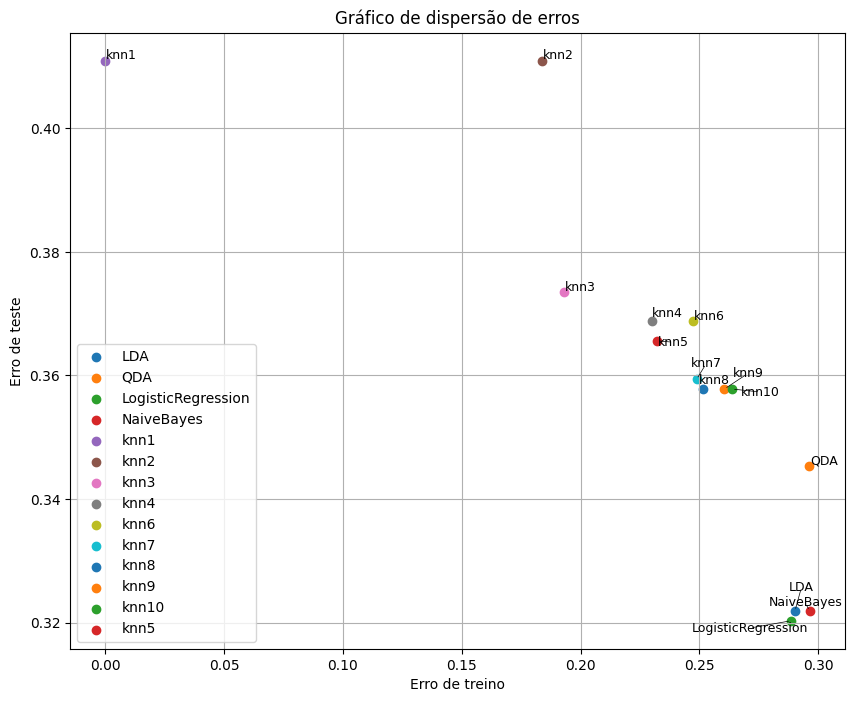

In [53]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.figure(figsize=(10,8))
plt.title('Gráfico de dispersão de erros')

texts = []
for model, (x_val, y_val) in errors.items():
    plt.scatter(x_val, y_val, label=model)
    texts.append(plt.text(x_val, y_val, model, fontsize=9))

plt.xlabel('Erro de treino')
plt.ylabel('Erro de teste')
plt.legend()
plt.grid(True)

adjust_text(
    texts,
    arrowprops=dict(arrowstyle="-", lw=0.5),
    expand_points=(1.2, 1.2),
    expand_text=(1.2, 1.2)
)

plt.show()
